- 이 코드는 [CLEVAL](https://github.com/clovaai/CLEval) 에서 참조했다.
- OCR 결과를 비교하기 전, 텍스트 박스 좌표가 시계방향으로 정렬되어있는지 확인하는 함수다.
- 아래 코드가 왜 성립하는지, 예외 케이스는 존재하지 않는 건지 궁금하다.

In [29]:
# TODO: why not using this logic?

def validate_clockwise_points(points):
    """
    Validates that the points that the 4 points that dlimite a polygon are in clockwise order.
    """

    if len(points) != 8:
        raise Exception("Points list not valid." + str(len(points)))

    point = [
                [int(points[0]) , int(points[1])],
                [int(points[2]) , int(points[3])],
                [int(points[4]) , int(points[5])],
                [int(points[6]) , int(points[7])]
            ]
    edge = [
                ( point[1][0] - point[0][0])*( point[1][1] + point[0][1]),
                ( point[2][0] - point[1][0])*( point[2][1] + point[1][1]),
                ( point[3][0] - point[2][0])*( point[3][1] + point[2][1]),
                ( point[0][0] - point[3][0])*( point[0][1] + point[3][1])
    ]

    summatory = edge[0] + edge[1] + edge[2] + edge[3]
    if summatory > 0:
        raise Exception("Points are not clockwise. The coordinates of bounding quadrilaterals have to be given in clockwise order. Regarding the correct interpretation of 'clockwise' remember that the image coordinate system used is the standard one, with the image origin at the upper left, the X axis extending to the right and Y axis extending downwards.")
    return 'valid!!'

- 예외 처리된 좌표에 대해서 실험

In [85]:
import cv2
ex_case1 = np.array([[1392, 423], [1392, 457], [1460, 456], [1458, 422]])
# 좌표의 시작점 (x,y)가 너무 크기 때문에, 시작점 (100, 100)으로 수정
x,y,w,h = cv2.boundingRect(np.array(ex_case1))
ex_case1[:,0] -= x - 50
ex_case1[:,1] -= y - 50   


canvas = Image.new('RGB', size = (200,200))
imgdraw = ImageDraw.Draw(canvas)

imgdraw.polygon(ex_case1.flatten().tolist(), fill = (255,255,255))
for i, pt in enumerate(ex_case1) :
    imgdraw.text(tuple(pt-10),str(i), fill = (0,255,0))



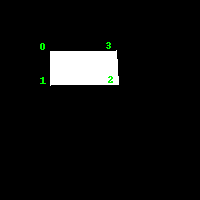

In [86]:
canvas

In [131]:
validate_clockwise_points(ex_case1.flatten().tolist())

Exception: Points are not clockwise. The coordinates of bounding quadrilaterals have to be given in clockwise order. Regarding the correct interpretation of 'clockwise' remember that the image coordinate system used is the standard one, with the image origin at the upper left, the X axis extending to the right and Y axis extending downwards.

- 샘플 실험

In [89]:
import numpy as np
from PIL import Image, ImageDraw

canvas = Image.new('RGB', size = (400,400))
imgdraw = ImageDraw.Draw(canvas)

samp_box1 = np.array([[100,100], [250,0], [300,50], [150,150]])
imgdraw.polygon(samp_box1.flatten().tolist(), fill = (255,255,255))
for i, pt in enumerate(samp_box1) :
    imgdraw.text(tuple(pt), str(i), fill = (0,255,255))


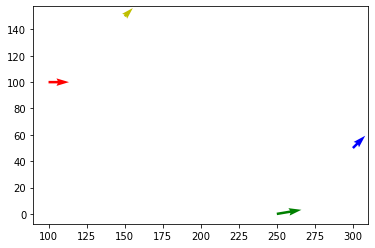

In [128]:
origin = list(zip(*samp_box1))

plt.quiver(*origin, np.roll(samp_box1[:,0], -1), np.roll(samp_box1[:,1], -1), color = ['r','g','b','y'] )
plt.show()

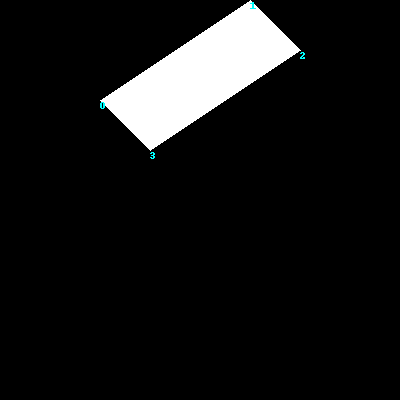

In [90]:
canvas

In [44]:
## 좌표의 순서를 바꾸면?
samp_box1_rolled = np.roll(samp_box1, -1, axis = 0) # Left Top에서 Right Top으로 
validate_clockwise_points(samp_box1_rolled.flatten().tolist())


'valid!!'

In [46]:
samp_box1_flip = np.flip(samp_box1, axis = 0)
validate_clockwise_points(samp_box1_flip.flatten().tolist())

Exception: Points are not clockwise. The coordinates of bounding quadrilaterals have to be given in clockwise order. Regarding the correct interpretation of 'clockwise' remember that the image coordinate system used is the standard one, with the image origin at the upper left, the X axis extending to the right and Y axis extending downwards.

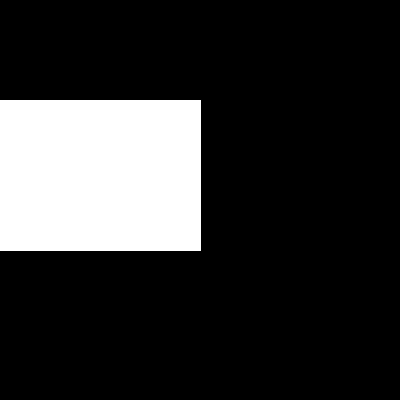

In [47]:
samp_box2 = np.array([[0,100], [200,100], [200,250], [0,250]])
canvas = Image.new('L', size = (400,400))
imgdraw = ImageDraw.Draw(canvas)
imgdraw.polygon(samp_box2.flatten().tolist(), fill = 255)

canvas 

In [48]:
validate_clockwise_points(samp_box2.flatten().tolist())

'valid!!'

In [43]:
validate_clockwise_points(samp_box1.flatten().tolist())

'valid!!'

<!-- - quadrilateral의 면(edge)을 보았을 때, 0->1은 2->3에 상응되고, 1->2는 3->0과 상응된다. 
- x좌표는 왼쪽에서 오른쪽으로 진행하는 특성상, 시계방향이라면 0->1의 x값은 양수, 그리고  2->3은 음수를 갖게 된다.
- 하지만, 0->1의 x좌표 간격과 2->3의 x좌표 간격의 합은 각 곱해진 y의 높이 차이에 의해 2->3이 항상  
 -->
- 함수의 summatory의 식을 풀어서 썼을 때,   
(x1y0 - x0y1) + (x2y1 - x1y2) + (x3y2 - x2y3) + (x4y3 - x3y4)  
정리된다.
- 
